<a href="https://colab.research.google.com/github/tgona/ImageColorizer/blob/main/ImageColorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data_folder_path = "/content/drive/MyDrive/data/"

Mounted at /content/drive


In [ ]:
import os
import torch
import torchvision.transforms as transforms
from PIL import Image
# Set input and output folders
color_folder = os.path.join(data_folder_path, 'colored_images')
grayscale_folder = os.path.join(data_folder_path, 'blacknwhite')

# Get a list of all image files in the input folder
color_image_files_list = os.listdir(color_folder)
black_white_image_list = os.listdir(grayscale_folder)
# Define the image size
image_size = (256, 256)

# Define the number of channels for the input (grayscale) and output (color) images
input_channels = 1  # Grayscale image has only 1 channel
output_channels = 3  # Color image has 3 channels (RGB)

# Set the device for training (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
import os
import torch
import torchvision.transforms as transforms
from PIL import Image

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the transformation to convert colored images to black and white
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor()
])

# Set input and output folders
input_folder = os.path.join(data_folder_path, 'colored_images')
output_folder = os.path.join(data_folder_path, 'blacknwhite')

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Get a list of all image files in the input folder
image_files = os.listdir(input_folder)

# Process each image
count = 0
for image_file in image_files:
    # Load the input colored image
    input_image_path = os.path.join(input_folder, image_file)
    input_image = Image.open(input_image_path)

    # Apply the transformation to convert the image to black and white
    bw_image = transform(input_image)

    # Save the black and white image with the same file name
    output_image_path = os.path.join(output_folder, image_file)
    bw_image_pil = transforms.ToPILImage()(bw_image)
    bw_image_pil.save(output_image_path)
    count+=1
    print(f"Converted {image_file} to black and white, img no. {count}")




Streaming output truncated to the last 5000 lines.
Converted opus55rgnedelacierpoliheerschappijvangepolijststaal1923jpgLargejpg.jpg to black and white, img no. 2392
Converted opoetajpgLargejpg.jpg to black and white, img no. 2393
Converted number1622013jpgLargejpg.jpg to black and white, img no. 2394
Converted number1352013jpgLargejpg.jpg to black and white, img no. 2395
Converted number1142012jpgLargejpg.jpg to black and white, img no. 2396
Converted notdetected242118jpgLargejpg.jpg to black and white, img no. 2397
Converted nostradamusemilgrigorasartistacontemporaneojpgLargejpg.jpg to black and white, img no. 2398
Converted nmero460a1963jpgLargejpg.jpg to black and white, img no. 2399
Converted opusindebitjpgLargejpg.jpg to black and white, img no. 2400
Converted number3802014jpgLargejpg.jpg to black and white, img no. 2401
Converted opapqueveiodeleste1980jpgLargejpg.jpg to black and white, img no. 2402
Converted number3412014jpgLargejpg.jpg to black and white, img no. 2403
Converted

## **To Quickly Delete the blacknwhite output folder, run the cell below. This prevents duplicates if cell above is run too many times.**

In [ ]:
import os
import shutil

# Set the path to the output folder
output_folder = os.path.join(data_folder_path, 'blacknwhite')

# Delete the output folder and its contents
shutil.rmtree(output_folder)

print("Output folder deleted.")

Output folder deleted.


In [ ]:
# Create a transformation to preprocess the images
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize to the range [-1, 1]
])

# Create lists to store the paired grayscale and color images
paired_images = []
pair_count = 0
# Loop through the grayscale image files list and find matching color images
for bw_image_file in black_white_image_list:
    # Get the matching color image file
    color_image_file = os.path.join(color_folder, bw_image_file)

    # Check if the color image file exists
    if os.path.isfile(color_image_file):
        # Load the grayscale and color images
        bw_image = Image.open(os.path.join(grayscale_folder, bw_image_file)).convert('L')
        color_image = Image.open(os.path.join(color_folder, bw_image_file))

        # Apply the transformation to preprocess the images
        bw_image = transform(bw_image)
        color_image = transform(color_image)
        if color_image.size()[0] == 3:
          # Add the paired grayscale and color images to the list
          paired_images.append((bw_image, color_image))
          pair_count += 1

    if pair_count % 10 == 0:
        print(f"Paired {pair_count} images")
    if pair_count % 1000 ==0:
      break
print(f"total: {pair_count}")

Paired 10 images
Paired 20 images
Paired 30 images
Paired 40 images
Paired 50 images
Paired 60 images
Paired 70 images
Paired 80 images
Paired 90 images
Paired 100 images
Paired 110 images
Paired 120 images
Paired 130 images
Paired 140 images
Paired 150 images
Paired 160 images
Paired 170 images
Paired 180 images
Paired 190 images
Paired 200 images
Paired 210 images
Paired 220 images
Paired 230 images
Paired 240 images
Paired 250 images
Paired 260 images
Paired 270 images
Paired 280 images
Paired 290 images
Paired 300 images
Paired 310 images
Paired 320 images
Paired 330 images
Paired 340 images
Paired 350 images
Paired 360 images
Paired 360 images
Paired 370 images
Paired 380 images
Paired 390 images
Paired 400 images
Paired 410 images
Paired 420 images
Paired 430 images
Paired 440 images
Paired 450 images
Paired 460 images
Paired 470 images
Paired 480 images
Paired 490 images
Paired 500 images
Paired 510 images
Paired 520 images
Paired 530 images
Paired 540 images
Paired 550 images
P

# **Below is the first model used**

In [ ]:
import torch.nn as nn
#Original Model

class ColorizationModel(nn.Module):
    def __init__(self, input_channels, output_channels):
        super(ColorizationModel, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(input_channels, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, output_channels, kernel_size=3, stride=1, padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# GAN Model
class Generator(nn.Module):
    def __init__(self, input_channels, output_channels):
        super(Generator, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(input_channels, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, output_channels, kernel_size=3, stride=1, padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Discriminator model
class Discriminator(nn.Module):
    def __init__(self, input_channels):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Conv2d(input_channels, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2),
            nn.Conv2d(256, 1, kernel_size=4, stride=1, padding=0),
            nn.Sigmoid()
        )

    def forward(self, x):
        output = self.model(x)
        return output.view(-1, 1)


In [ ]:
# Create a PyTorch DataLoader to load the paired images in batches during training
batch_size = 16
data_loader = torch.utils.data.DataLoader(
    paired_images,
    batch_size=batch_size,
    shuffle=True,
    num_workers=4  # Adjust the number of workers based on your system configuration
)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
import torch
from sklearn.model_selection import train_test_split
# Define the batch size for testing
batch_size = 16

# Split the paired images into training and validation sets
train_images, val_images = train_test_split(paired_images, test_size=0.2, random_state=42)

# Create data loaders for training and validation sets
train_loader = torch.utils.data.DataLoader(
    train_images,
    batch_size=batch_size,
    shuffle=True,
    num_workers=4
)

val_loader = torch.utils.data.DataLoader(
    val_images,
    batch_size=batch_size,
    shuffle=False,
    num_workers=4
)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
# Create an instance of the colorization model
model = ColorizationModel(input_channels, output_channels).to(device)

# Define the loss function (e.g., mean squared error)
criterion = nn.MSELoss()

# Define the optimizer (e.g., Adam optimizer)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

# Set the number of training epochs
num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model in training mode

    for batch_idx, (grayscale_images, color_images) in enumerate(train_loader):
        grayscale_images = grayscale_images.to(device)
        color_images = color_images.to(device)

        # Forward pass
        colorized_images = model(grayscale_images)

        # Swap input and output channels for loss calculation
        loss = criterion(colorized_images, color_images)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_idx % 10 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx}/{len(train_loader)}], Loss: {loss.item()}")

    # Validation loop
    model.eval()  # Set the model in evaluation mode
    total_val_loss = 0

    with torch.no_grad():
        for val_batch_idx, (val_grayscale_images, val_color_images) in enumerate(val_loader):
            val_grayscale_images = val_grayscale_images.to(device)
            val_color_images = val_color_images.to(device)

            val_colorized_images = model(val_grayscale_images)
            val_loss = criterion(val_colorized_images, val_grayscale_images)
            total_val_loss += val_loss.item()

        average_val_loss = total_val_loss / len(val_loader)
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {average_val_loss}")

    # Save the model state after each epoch
    if epoch % 2 == 1:
        torch.save(model.state_dict(), f'/content/drive/MyDrive/data/colorization_model_epoch_lrx5_{epoch+1}.pth')

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch [1/10], Batch [0/50], Loss: 0.40713655948638916
Epoch [1/10], Batch [10/50], Loss: 0.19214282929897308
Epoch [1/10], Batch [20/50], Loss: 0.12496989220380783
Epoch [1/10], Batch [30/50], Loss: 0.08646269887685776
Epoch [1/10], Batch [40/50], Loss: 0.12284717708826065


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([16, 1, 256, 256])) that is different to the input size (torch.Size([16, 3, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/10], Validation Loss: 0.034971754281566694


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([8, 1, 256, 256])) that is different to the input size (torch.Size([8, 3, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [2/10], Batch [0/50], Loss: 0.07188869267702103
Epoch [2/10], Batch [10/50], Loss: 0.08488299697637558
Epoch [2/10], Batch [20/50], Loss: 0.08603527396917343
Epoch [2/10], Batch [30/50], Loss: 0.10038086771965027
Epoch [2/10], Batch [40/50], Loss: 0.057741954922676086
Epoch [2/10], Validation Loss: 0.02522648784976739
Epoch [3/10], Batch [0/50], Loss: 0.05945197865366936
Epoch [3/10], Batch [10/50], Loss: 0.0651736631989479
Epoch [3/10], Batch [20/50], Loss: 0.048718731850385666
Epoch [3/10], Batch [30/50], Loss: 0.09066566079854965
Epoch [3/10], Batch [40/50], Loss: 0.09009388834238052
Epoch [3/10], Validation Loss: 0.017917969908851843
Epoch [4/10], Batch [0/50], Loss: 0.05353598669171333
Epoch [4/10], Batch [10/50], Loss: 0.05105960741639137
Epoch [4/10], Batch [20/50], Loss: 0.05992668494582176
Epoch [4/10], Batch [30/50], Loss: 0.07656656950712204
Epoch [4/10], Batch [40/50], Loss: 0.027724027633666992
Epoch [4/10], Validation Loss: 0.01733049227354618
Epoch [5/10], Batch [0

KeyboardInterrupt: ignored

# Testing Cell Underneath

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision.transforms import ToPILImage
from PIL import Image

# Assuming you have defined your model and loaded the trained weights
# model = ...

# Set the device to run the model on
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Create a DataLoader for the test dataset
# Use val_loader

# Set the model to evaluation mode
model = ColorizationModel(input_channels, output_channels)
model.load_state_dict(torch.load('/content/drive/MyDrive/data/colorization_model_epoch_lrx5_4.pth'))
model.to(device)
model.eval()

# Define a function to convert a tensor to a PIL Image
to_pil = ToPILImage()

# Define a variable to store the total mean squared error
total_mse = 0.0

# Disable gradient calculation to speed up inference
with torch.no_grad():
    # Iterate over the test data in batches
    for images, targets in val_loader:
        # Move the data to the device
        images = images.to(device)
        targets = targets.to(device)

        # Forward pass
        outputs = model(images)

        # Calculate the mean squared error (MSE) between the predicted images and the ground truth images
        mse = torch.mean((outputs - targets) ** 2)
        total_mse += mse.item()

        # Convert the predicted and ground truth images to PIL Images
        predicted_images = to_pil(outputs.cpu().squeeze(0))
        ground_truth_images = to_pil(targets.cpu().squeeze(0))

        # Save the predicted and ground truth images
        predicted_images.save("predicted_image.jpg")
        ground_truth_images.save("ground_truth_image.jpg")

# Calculate the average mean squared error
average_mse = total_mse / len(val_loader)

# Print the average mean squared error
print("Average MSE: {:.6f}".format(average_mse))


ValueError: ignored

In [ ]:
# Training loop
num_epochs = 10
batch_size = 16

# Define the file paths for saving the models
generator_path = "generator_model.pt"
discriminator_path = "discriminator_model.pt"

for epoch in range(num_epochs):
    for batch_idx, (grayscale_images, color_images) in enumerate(data_loader):
        # Transfer images to the GPU (if available)
        grayscale_images = grayscale_images.to(device)
        color_images = color_images.to(device)

        # Train the discriminator
        discriminator.zero_grad()
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # Discriminator loss for real images
        real_outputs = discriminator(color_images)
        d_loss_real = adversarial_loss(real_outputs, real_labels)

        # Discriminator loss for fake images
        fake_images = generator(grayscale_images)
        fake_outputs = discriminator(fake_images.detach())
        d_loss_fake = adversarial_loss(fake_outputs, fake_labels)

        # Total discriminator loss
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        discriminator_optimizer.step()

        # Train the generator
        generator.zero_grad()
        fake_outputs = discriminator(fake_images)
        g_loss = adversarial_loss(fake_outputs, real_labels)
        g_loss.backward()
        generator_optimizer.step()

        # Print the losses
        if batch_idx % 10 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx}/{len(data_loader)}], "
                  f"Discriminator Loss: {d_loss.item():.4f}, Generator Loss: {g_loss.item():.4f}")

    # Save the models after each epoch
    torch.save(generator.state_dict(), generator_path)
    torch.save(discriminator.state_dict(), discriminator_path)
    print("Models saved.")

print("Training complete.")


NameError: ignored

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image

# Example tensor
tensor = torch.randn(3, 256, 256)
def displayColorized(inputImage):
  # Define the inverse transformation
  denormalize = transforms.Compose([
      transforms.Normalize(mean=[-1, -1, -1], std=[2, 2, 2]),  # Denormalize image
      transforms.ToPILImage(),  # Convert tensor to PIL Image
  ])

  # Apply the inverse transformation
  image = denormalize(inputImage)

  # Save the image to a folder
  results_folder = os.path.join(data_folder_path, 'OutputFolder/')
  image.save(results_folder + "output_image1.jpg")

  # Display the image
  image.show()
  # Perform some operations on the image



Saving 9962166a601248dabcd76b5e09a989f9jpgLargejpg (1).jpg to 9962166a601248dabcd76b5e09a989f9jpgLargejpg (1) (2).jpg


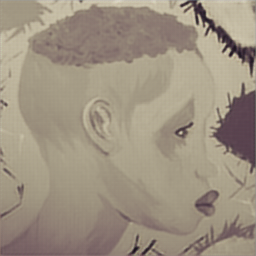

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
from google.colab import files
from IPython.display import display

# Load the saved model
model = ColorizationModel(input_channels, output_channels)
model.load_state_dict(torch.load('/content/drive/MyDrive/data/colorization_model_epoch_5.pth'))
model.to(device)
model.eval()

# Create a transformation to preprocess the user-uploaded image
image_transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Prompt the user to upload a grayscale image
uploaded_image = files.upload()
image_path = next(iter(uploaded_image))

# Load and preprocess the user-uploaded grayscale image
user_image = Image.open(image_path).convert('L')
user_image_tensor = image_transform(user_image)

# Colorize the grayscale image using the model
with torch.no_grad():
    colorized_image = model(user_image_tensor)
displayColorized(colorized_image)

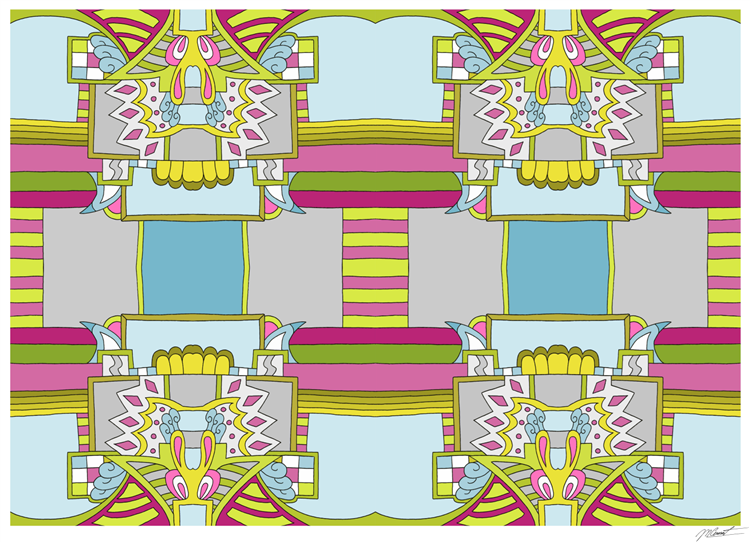

In [ ]:
from PIL import Image

def display_image(image_path):
    # Open the image
    image = Image.open(image_path)
    image.show()

# Example usage
image_path = os.path.join(color_folder,black_white_image_list[20])
display_image(image_path)

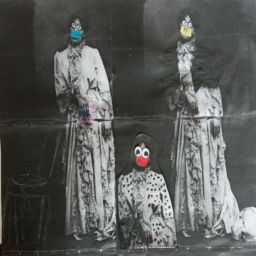

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image

# Load the image
image = Image.open(os.path.join(color_folder,black_white_image_list[113]))

# Define the transformation
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize to the range [-1, 1]
])

# Convert the image to a tensor
tensor = transform(image)

# Perform denormalization
denormalize = transforms.Compose([
    transforms.Normalize(mean=[-1, -1, -1], std=[2, 2, 2]),  # Denormalize image
    transforms.ToPILImage(),  # Convert tensor to PIL Image
])

# Convert the tensor back to an image
denormalized_image = denormalize(tensor)

# Display the image
denormalized_image.show()


In [ ]:
test_stacking = torch.stack([pair[0] for pair in paired_images])


In [ ]:
test_stacking_again = torch.stack([pair[1] for pair in paired_images])


In [ ]:
for pair in paired_images:
  print(pair[1].size()[0])

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
